# Seabornで簡単にお洒落な図を描画する編
> `index`
> + [24 ヒストグラム，散布図編](#24-ヒストグラム，散布図編)
> + [25 barplot, boxplot, swarmplot等](#25-barplot,-boxplot,-swarmplot等)
> + [26 Heatmapを描画](#26-Heatmapを描画)
> + [27 装飾(style)](#27-装飾(style))

> `Cf.`
> + [データサイエンスのためのPython入門24〜Seabornで簡単にお洒落な図を描画する【ヒストグラム，散布図編】〜](https://datawokagaku.com/seaborn_distribution/)
> + [データサイエンスのためのPython入門25〜Seabornで簡単にお洒落な図を描画する【barplot, boxplot, swarmplot等】〜](https://datawokagaku.com/seaborn_categoricalplot/)
> + [データサイエンスのためのPython入門26〜Seabornを使ってデータサイエンスに必須のHeatmapを描画する〜](https://datawokagaku.com/seaborn_heatmap/)
> + [データサイエンスのためのPython入門27〜Seabornの装飾(style)をいじる〜](https://datawokagaku.com/seaborn_set/)


## 24 ヒストグラム，散布図編

### |Seabornをimport

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### | sns.distplot()
>    (頻出)一番使います．とりあえず，あるデータの分布がみたい時にこれを呼びます．

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

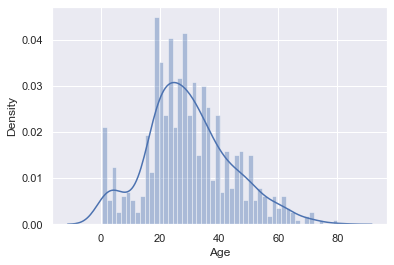

In [14]:
import pandas as pd

df = pd.read_csv('input/train.csv')
df = df.dropna(subset=["Age"]) # 描画の際のノイズ除去
sns.set() # グリッド線など引いてくれる
sns.distplot(df['Age'], bins=50) #kde : カーネル密度曲線の有無

### | sns.jointplot()
>     2変数の分布をみる

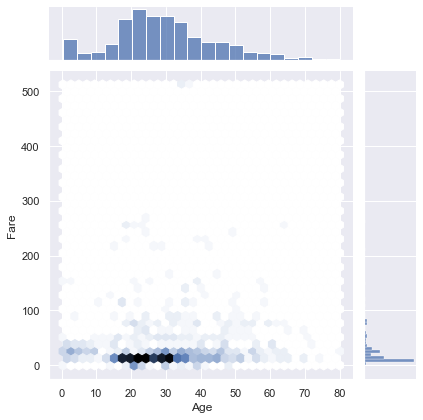

In [16]:
sns.jointplot(x='Age', y='Fare', data=df, kind='hex')

    kind指定してhexにすると重なりの具合が明瞭になる。（デフォでscatterが入っている）
    Fareの外れ値のせいであんまりいい図ではないですが 笑

### |(重要)sns.pairplot()
>      複数のカラムの分布を一発で表示

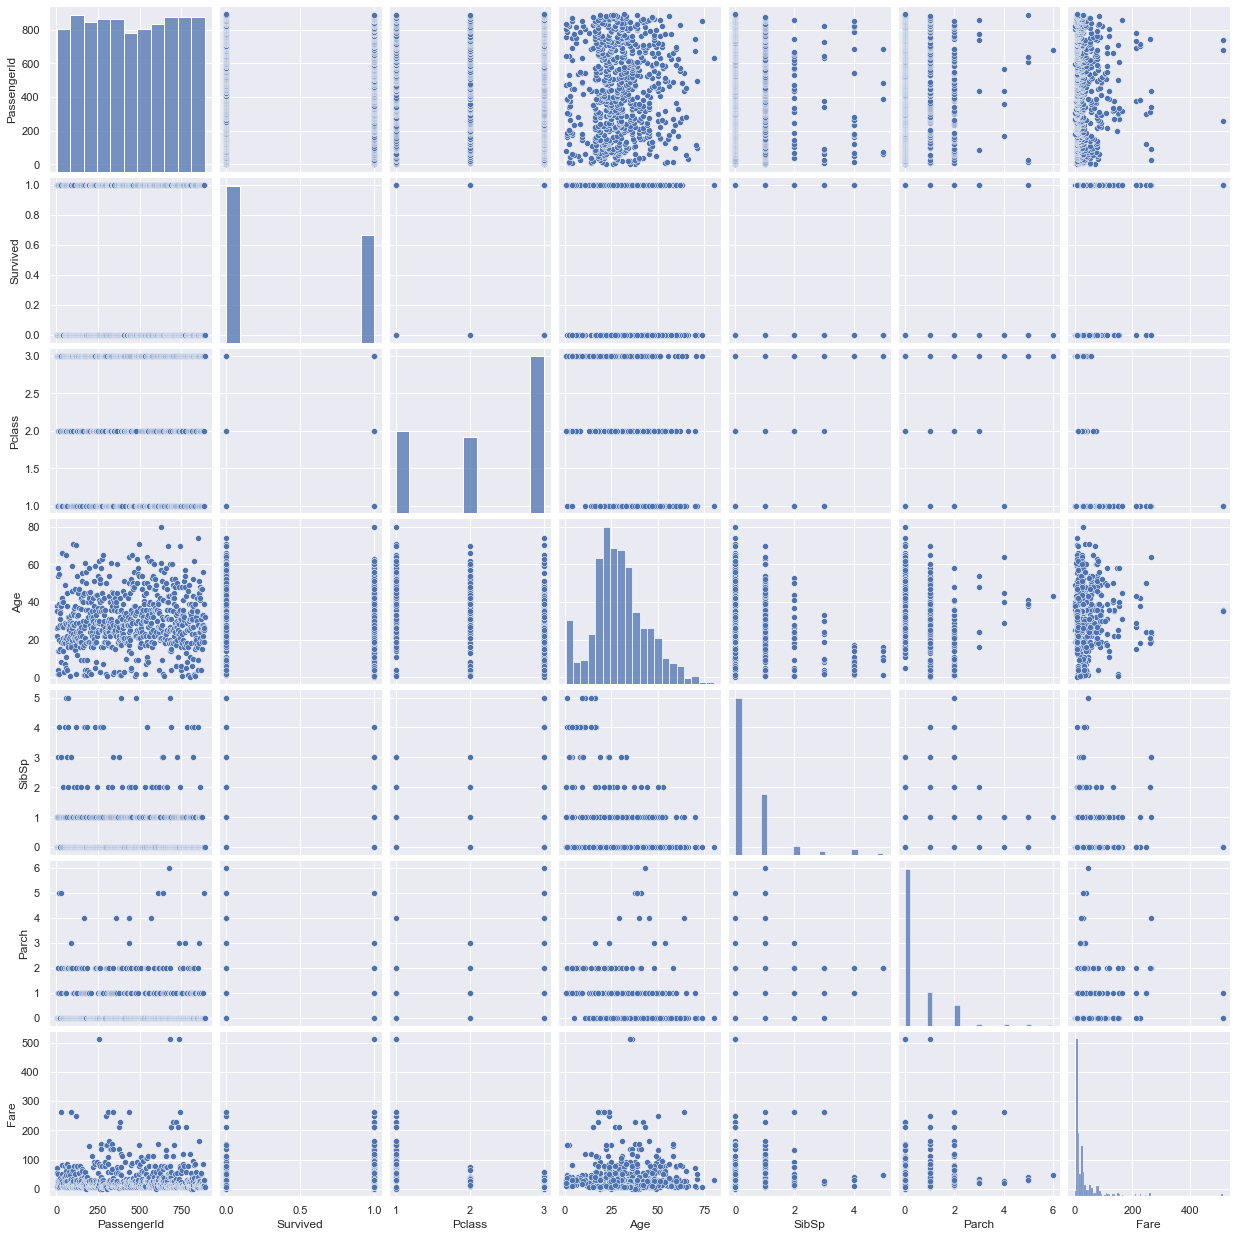

In [19]:
sns.pairplot(df)

>      ・・・いきなりこれみてもなにがなんだかって感じですよね笑
>      縦軸と横軸にカラムが並んでいて，そのカラム間の散布図を表示してます．
>      同じカラムが交差するところには，そのカラムのヒストグラムが表示されます．
>      つまり，例えば縦軸Fare，横軸Ageの散布図をみると先ほどのjointplotの例で出したplotと同じですし，
>      縦軸Age, 横軸Ageのグラフをみると，Ageのヒストグラムになってます．（bin幅が違うので先の例とはあまり似てませんが，）

> <img src='https://datawokagaku.com/wp-content/uploads/2020/02/pairplot_hist_joint.png' width=45%>


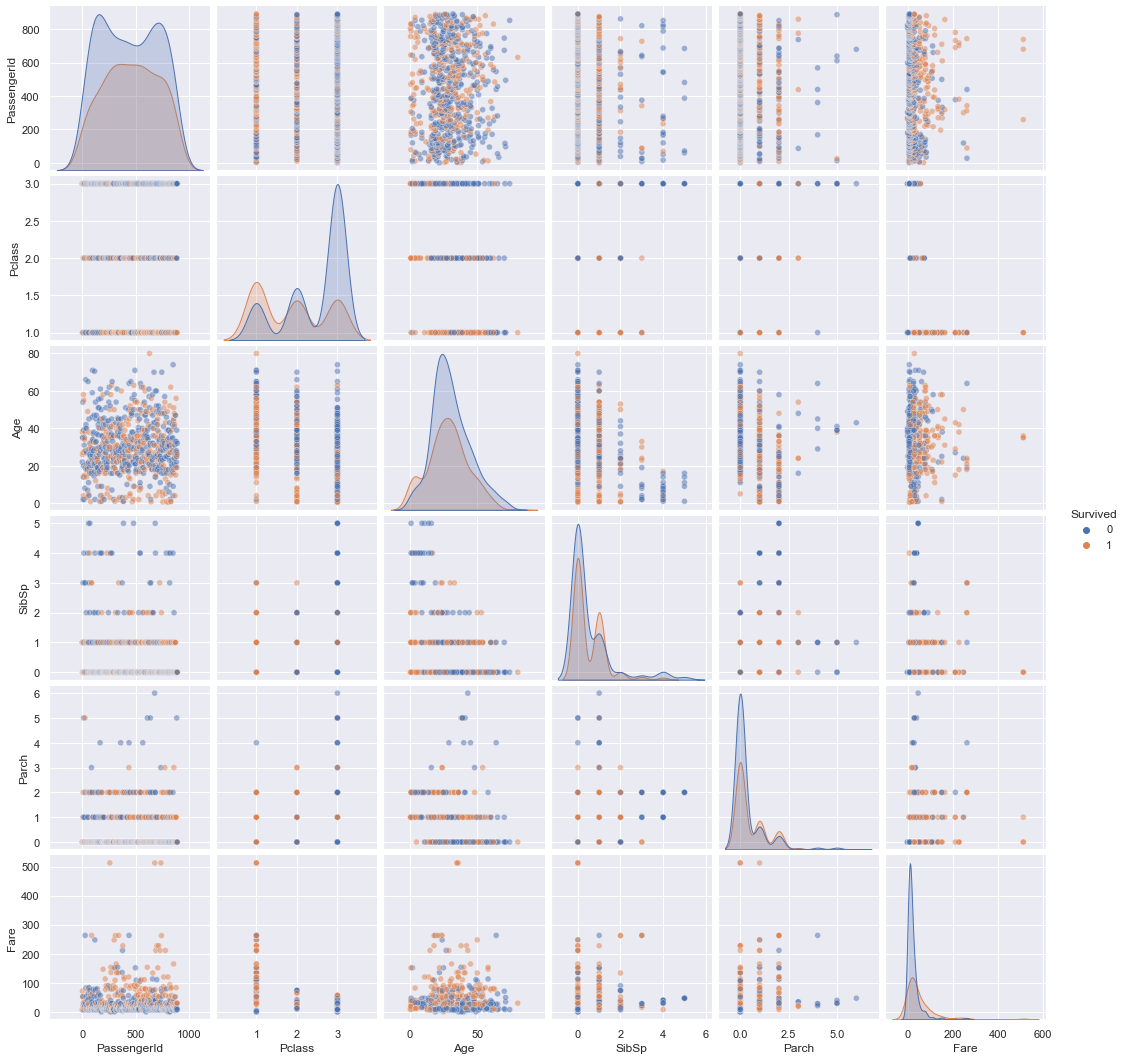

In [20]:
sns.pairplot(df, hue='Survived', kind='scatter', plot_kws={'alpha':0.5})

> `Cf.`
> + [seabornでグラフを複数のグラフを描画する - Qiita](https://qiita.com/txt_only/items/b954e26be739bee5621e)

In [21]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='size', ylabel='count'>

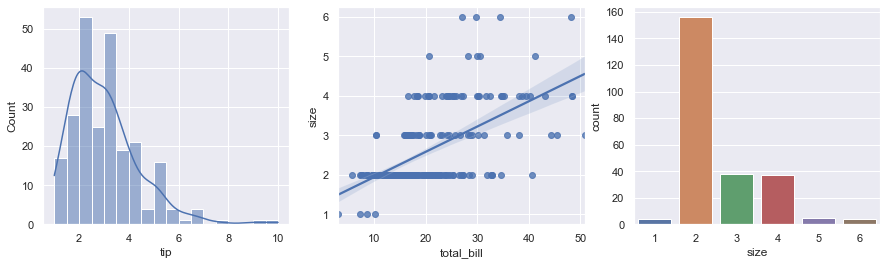

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
sns.histplot(tips_df['tip'], kde=True, ax=ax1)
sns.regplot(x='total_bill', y='size', data=tips_df, ax=ax2)
sns.countplot(x='size', data=tips_df, ax=ax3)

## 25 barplot, boxplot, swarmplot等
>     今回紹介するのは,
>
>     - sns.barplot()
>     - sns.countplot()
>     - sns.boxplot()
>     - sns.violinplot()
>     - sns.swarmplot()
>
>     よく使うのはboxplotとswarmplotです．
>     特に私はswarmplotが好きです．データ数にもよりますが，そこまでデータ数が多くない場合はswarmplotで分布をみるようにしています．
>     特にこの二つを覚える意識で読み進めてください．

In [37]:
import seaborn
%matplotlib inline
import pandas as pd

df = pd.read_csv('input/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### | sns.barplot()
>     いわゆる「棒グラフ」を作る
>     x引数にカテゴリーのカラム,y引数に比較対象のカラム,

<AxesSubplot:xlabel='Survived', ylabel='Age'>

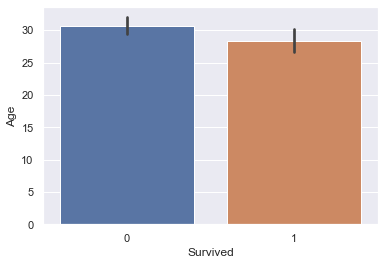

In [41]:
sns.barplot(x='Survived' , y='Age' , data=df)

>     横軸にSurvived， 縦軸にAgeがきていて， それぞれの平均値が棒グラフで比較できるようになっています．
>     黒い線が引かれているのは Error-Bar と呼ばれるもので， 不確かさを示すものです．

>     今回の「平均値」というのはあくまでもタイタニックデータの train.csv という「ある母集団(=全乗客)に対しての標本(=train.csv)を取った際の平均値」であり, 全乗客の平均値ではないです．が，統計的に「全乗客の平均値はだいたいこの辺に含まれるよ」というのがわかります．
>     その範囲を示すのが Errror-Bar だと思ってください．
    

>     Seabornではデフォルトで95%信頼区間が Error-Bar になっています．
>     感覚的にいうと， 「正規分布の母集団に対して100回ランダムにデータを抽出してその平均から95%信頼区間を求めたら，95回はその区間に母集団の平均が含まれる」というのを統計的に裏付けているものだとおもえばOKです．

>     また，この二つの平均値に対して「本当に差があるのか？」「たまたま標本データがそういうデータなのでは？」(これを統計的有意性という)という疑問に対しても，この信頼区間というのが関わってきます．
>     なので， 統計がわかる人が上のbarplotを見れば， 統計的有意性(今後統計学講座でやります)を示されなくても Error-Bar を見れば有意性の有無は大体わかります．
>
>     Seabornでこの Error-Bar の信頼区間(Confidence Intervals)を変えたい，または標準偏差を使いたい場合はci引数を使います．
>     興味がある人はリファレンスを確認してください．

>     また， 平均値以外の値を比較したい場合estimator引数を使います．
>     これには， aggregate function（第15回でも触れました）を使いますが， NumPyの関数でだいたい事足りるので， それ以上の深追いは不要だと思います．

<AxesSubplot:xlabel='Survived', ylabel='Age'>

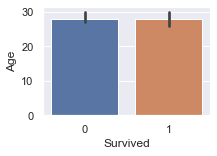

In [45]:
# 例えば平均じゃなくて中央値を比べたかったら
import numpy as np
plt.figure(figsize=(3,2))
sns.barplot(x='Survived', y='Age', data=df, estimator=np.median)

>     こんな感じでestimatorにnp.median関数を入れればOK.
>     んーこれは面白い，中央値を比較すると有意差が無いように見えますね．

>     この謎は前回pairplotで出したhue=’Survived’のAgeのヒストグラムを見るとわかるかもしれません．
> <img src='https://datawokagaku.com/wp-content/uploads/2020/02/pariplot_age_hist.png' width=25%>
>
>     一つの統計量だけを比べると，ミスリーディングが起きるいい例ですね．

### | sns.countplot()
>    データ数を比較する
>    カテゴリーとするカラム名を引数xに入れます．hue引数を使うことでさらに区分け

<AxesSubplot:xlabel='Sex', ylabel='count'>

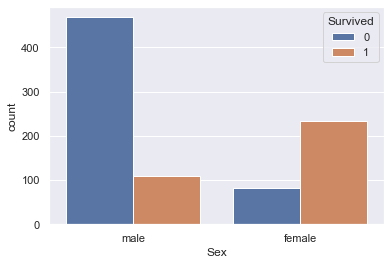

In [46]:
sns.countplot(x='Sex', data=df, hue='Survived')

### | sns.boxplot()
>    カテゴリ別に値を比較する

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

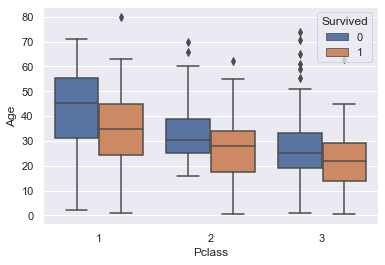

In [48]:
sns.boxplot(x='Pclass', y='Age', data=df, hue="Survived")

>     あくまでもグラフは「見せるもの」でありわかりやすい必要があります．
>     肝心なのは、「そのグラフで何を説明するか」が重要です．

> `memo`
>
>     私だったらこのグラフでは「チケットのクラスが上がる（1st→3rd）につれて年齢層が上がっており，
>     同クラス内では生存者の方が年齢が低い傾向がある」と説明します．
>     (もちろん，厳密にいうには統計的に有意であることを証明する必要はありますが)
>     逆にいうと，それを説明するためにこのグラフを作るイメージですね．

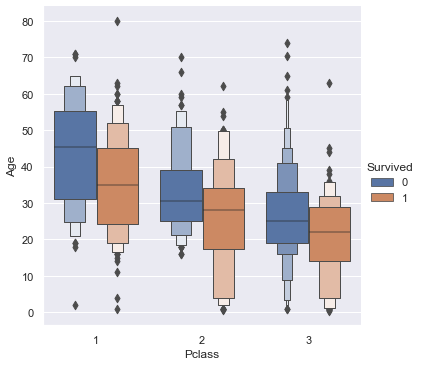

In [70]:
sns.catplot(x='Pclass', y='Age', data=df, kind="boxen", hue="Survived") #kind=boxで普通の箱髭図

### | sns.violinplot()
>     データの分布を可視化できる
>     使い方はboxplot()と同じです．boxplotだと，データの分布がどうなっているのかわからないですが，
>     violinplotはデータの分布に応じて箱の形が変わります．
>     大抵のデータでは平均にデータが集まる(正規分布など)ので結果バイオリンのような形をするのでviolinplotと呼びます．

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

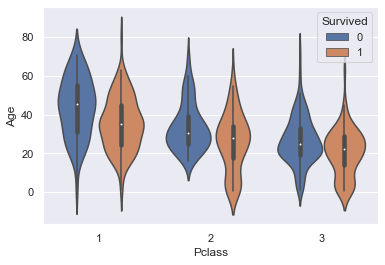

In [51]:
sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived')

>     情報量が増えるので， 若干ビジーなのと見たことない人からすると見方がわからないので注意です．
>
>     「なにを伝えたいか」によって使うグラフを変えましょう．
>     もし統計量の比較だけを伝えたいなら先ほどのboxplotで事足りるし， Ageの分布をちゃんと説明したい場合（例えば1stクラスはAgeが全体に分布しているが，2ndと3rdはやたら平均に偏ってるとか）はviolinplotがいいかもしれません．

>     boxplotだけではわからない情報がみえるので面白いです．2ndと3rdは分布の形が似てますね．
>     boxplot同様，hue引数を指定することも可能です．やってみてください．

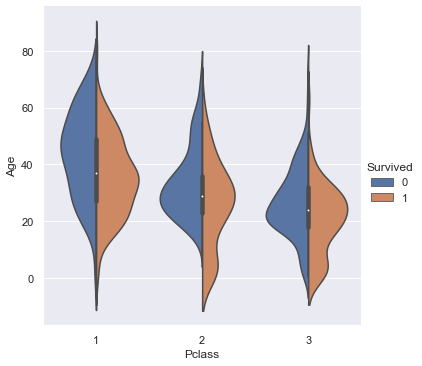

In [66]:
# catplotでもできるよ。
sns.catplot(x='Pclass', y='Age', data=df, kind='violin', hue='Survived', split=True)

### | sns.swarmplot()
>     本当の分布を確認できる(分布をさらに深堀)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

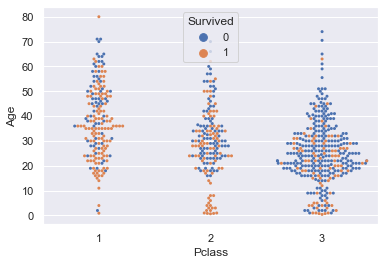

In [61]:
sns.swarmplot(x="Pclass", y="Age", data=df, size=3, hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

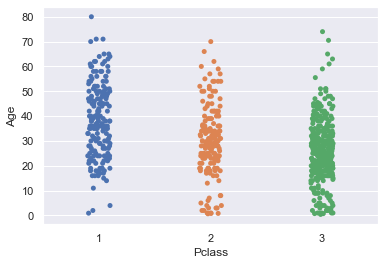

In [53]:
sns.stripplot(x="Pclass", y="Age", data=df)

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


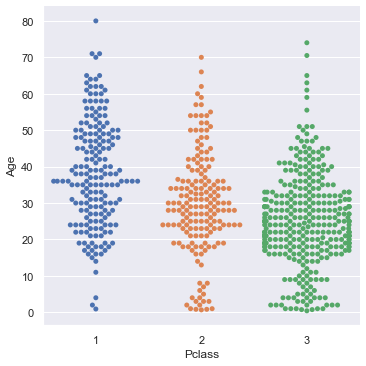

In [68]:
# catplotでもできるよ
sns.catplot(x="Pclass", y="Age", data=df, kind="swarm")

## 26 Heatmapを描画
>     特に各カラム間の相関を示す相関表(Correlation Matrix)や，
>     混同行列(Confusion Matrix)でよく使います．
>     Correlation MatrixやConfusion Matrixは， データサイエンスで頻出の表なのでこのHeatmapもよく使います．
>     (とにかく，データサイエンスではこのような「各カラム間で持つ値を表にする」ことが多く， SeabornのHeatmapで可視化すると一目でどのカラム間の値が低いか・高いかがわかるので便利なんです．)


> `memo`
>
>     相関というのは， カラム間の関係の強さを表します．
>     -1から1の数字は相関係数と呼ばれるもので， 相関の強さを表す係数です．
>     例えば「’年齢’があがるにつれ’身長’が高くなる」データがあったとしたら，「’年齢’と’身長’には正の相関関係がある」と言え，正の相関係数になりす．
>     その強さを相関係数で数学的に示すことができます．
>     逆に「’年齢’があがるにつれ’髪の毛の量’が減る」のであれば「’年齢’と’髪の毛の量’には負の相関関係がある」と言え，相関係数は負の値になります．(うー怖い)
>
>     0.2とか0.3の相関係数が， 相関が「強い」のかどうかは実際のところこれだけだとわかりません．
>     これを確認するには実際に散布図を見るのが一番ですが， 個人的には相関係数が0.2~0.4程度だと，強いとは言えず，「弱いけど相関がある」程度です．
>     なので，「比較的」という言い方をしてました． また，相関係数だけをみるとミスリーディングになるので注意です．
>     正の相関と負の相関が相殺して相関係数が0になるケースもあります．「相関係数が0だから相関がない」ということにはなりません．

In [73]:
import seaborn as sns; sns.set()
%matplotlib inline

### | df.corr()で相関表を作る

In [72]:
import pandas as pd
df = pd.read_csv('input/train.csv')
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### | sns.heatmap()
>     よく使う引数はcmap(color map)とannot(annotation)です．
>     機械学習でも多クラスのConfusion Matrixを表示するのに重宝します．

> `Cf.`
> + [Choosing Colormaps in Matplotlib - matplotlib 3.1.3](https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html)

<AxesSubplot:>

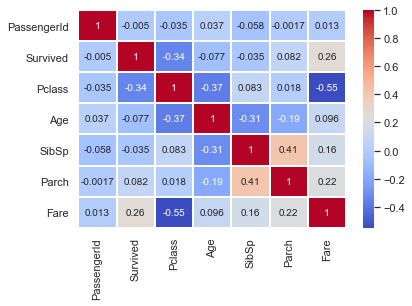

In [79]:
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidth=1)

#### データを俯瞰する際に役立つ
> `Cf.`
> + [seaborn.heatmap - seaborn 0.11.1](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
> + [seaborn-data - github](https://github.com/mwaskom/seaborn-data)

In [85]:
flights = sns.load_dataset("flights")
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [89]:
# pivotテーブル作成
flights_pivot = flights.pivot_table(values="passengers" , index="month" , columns="year")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

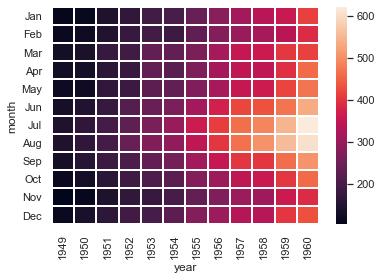

In [92]:
sns.heatmap(flights_pivot, linewidths=1)

>     このように，時系列のように連続した値をindexやcolumnsに指定してHeatmapを使うと，値の変化が一目でわかります．
>     「毎年夏に乗客が多く，年々乗客の数は増えているというのがわかると思います．」

## 27 装飾(style)

In [96]:
import seaborn as sns
%matplotlib inline
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### | sns.set()で基本Style変更

> 色々引数はありますか，大きく３つ
>> + context
>> + style
>> + palette
>
>     set()に使える、引数はいくつもあるが、リファレンスが少ない。
>     それぞれに関数があります. set_context(), set_style(), set_palette().Jupyterでリファレンスする際はコレをみると詳細！

> `memo`
>
>     ちなみに， このsns.set()やset_xxx()は一つ一つのグラフに対してセットするのではなく， 一つのnotebook全体に影響します． 全体魔法です!!!

#### - context引数
>    用途を指定

In [ ]:
sns.set_context()

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

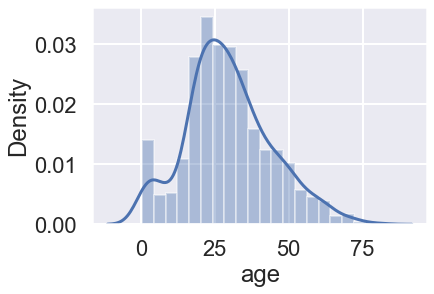

In [98]:
sns.set(context="poster")

titanic = titanic.dropna(subset=["age"])
sns.distplot(titanic["age"])

#### - style引数
>    グラフ全体のstyleを指定

In [ ]:
sns.set_style()

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

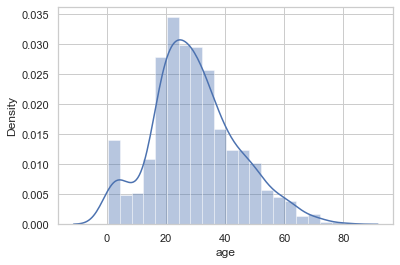

In [106]:
sns.set(style="whitegrid")

# sns.barplot(titanic["alone"])
sns.distplot(titanic["age"])

#### - palette引数
>     色を指定

In [ ]:
sns.set_palette()

<Figure size 144x72 with 0 Axes>

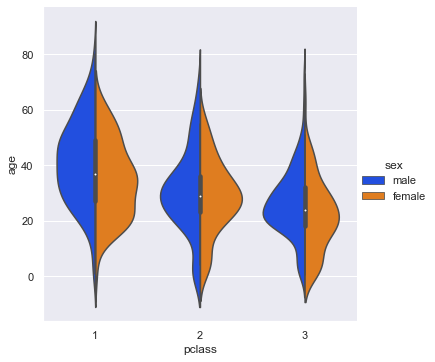

In [118]:
sns.set(palette="bright")
sns.catplot(x="pclass", y="age", data=titanic, kind="violin", hue="sex", split=True)

### | sns.despine()
>     軸や枠を落とす

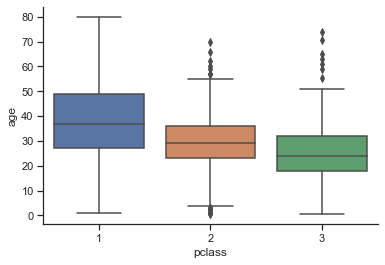

In [125]:
sns.set(style="ticks") #枠線と軸ができる
sns.boxplot(x="pclass", y="age", data=titanic)
sns.despine()

### | matplotlibと同様pltモジュールで色々なことができる
>     Seabornは内部でmatplotlibを使っているので，基本的にmatplotlibでやっていたようなことがSeabornでも同じようにできます．

<Figure size 576x288 with 0 Axes>

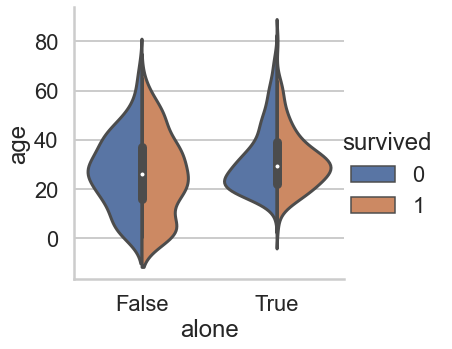

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.set(context="poster", style="whitegrid")
sns.catplot(x="alone", y="age", data=titanic, kind="violin", hue="survived", split=True)
plt.savefig("output/plotting_solitary death.png")

> `memo`
>
>     私はあまりSeabornの装飾をどうこういじることはしません．
>     私が働くチームで，資料の綺麗さとかデザインに対して細かく言われることはまずありません．
>
>     グラフも， 基本的には 比較対象 と その結果 がみて分かればOKです．(実はこれが意外にできてない人が多い）
>
>     Seabornはあくまでもツールです．「見せたいもの」「伝えたい事」が一目でわかるグラフを作るのはSeabornではなくデータサイエンティストです．
>     Seabornを使えばそれを簡単に実現できる一方，簡単に(見た目はかっこいいが)わかりにくくビジーな図も作れます．